In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving customer_merge_Category1.csv to customer_merge_Category1.csv


In [0]:
df_raw=pd.read_csv("customer_merge_Category1.csv", engine="python",encoding="euc-kr")

In [0]:
df_raw = df_raw.loc[:,"주문자ID":"카페"]

In [5]:
df_raw.isnull().sum()

주문자ID        0
상품구매금액       0
나이           0
성별           0
유입경로         0
유입기기         0
사업자구분        0
회원구분         0
가입-최종주문기간    0
AgeGroup     0
region       0
한식           0
중식           0
일식           0
양식           0
분식           0
카페           0
dtype: int64

In [0]:
df_num = df_raw.select_dtypes(exclude="object")

In [7]:
df_raw_y=df_num["상품구매금액"]
df_raw_x =df_num.drop("상품구매금액",axis=1, inplace = False)

df_t_x,df_test_x,df_t_y,df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3, random_state=1234)


print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))
df_train_x,df_val_x,df_train_y,df_val_y = train_test_split(df_t_x,df_t_y,test_size=3/7, random_state=1234)
print("val data X size:{}".format(df_val_x.shape))
print("val data Y size:{}".format(df_val_y.shape))
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))

test data X size:(1476, 8)
test data Y size:(1476,)
val data X size:(1475, 8)
val data Y size:(1475,)
train data X size:(1966, 8)
train data Y size:(1966,)


In [8]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set:1.000
Score on test set:0.521


In [0]:
train_score=[]; test_score=[]

para_leaf =[n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeRegressor(random_state =1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["TestScore"]=test_score

In [10]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.521
1,2,0.848,0.635
2,3,0.786,0.657
3,4,0.728,0.670
4,5,0.712,0.677
5,6,0.703,0.681
6,7,0.694,0.678
7,8,0.677,0.664
8,9,0.665,0.642
9,10,0.664,0.641


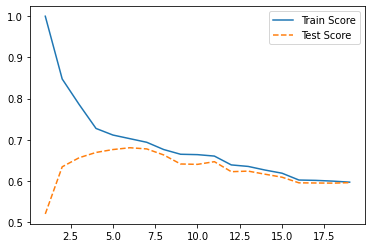

In [11]:
plt.plot(para_leaf,train_score, linestyle="-",label="Train Score")
plt.plot(para_leaf,test_score,linestyle="--",label="Test Score")
plt.legend()

In [0]:
v_feature_name =df_train_x.columns

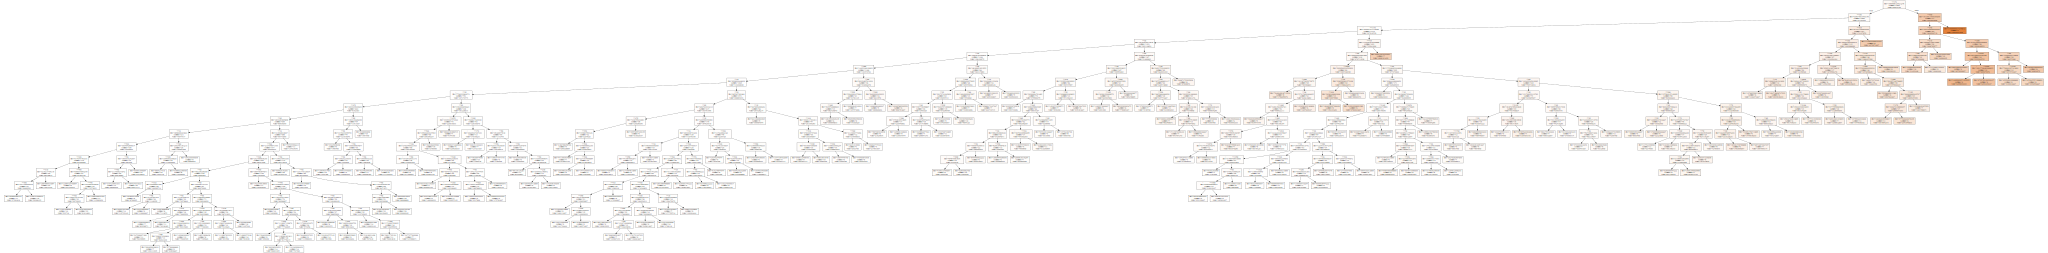

In [14]:
tree_graph =DecisionTreeRegressor(random_state=1234, min_samples_leaf=6)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot",feature_names=v_feature_name, impurity=True,filled=True)
with open("tree_leaf.dot") as f:
    dot_graph =f.read()
display(graphviz.Source(dot_graph))

In [0]:
train_score=[]; test_score=[]
para_split=[n_split*2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=6,min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
df_score_split=pd.DataFrame()
df_score_split["MinSamplesSplit"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["TestScore"]=test_score

In [16]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.703,0.681
1,6,0.703,0.681
2,8,0.703,0.681
3,10,0.703,0.681
4,12,0.703,0.681
5,14,0.700,0.679
6,16,0.699,0.680
7,18,0.695,0.685
8,20,0.691,0.687
9,22,0.687,0.687


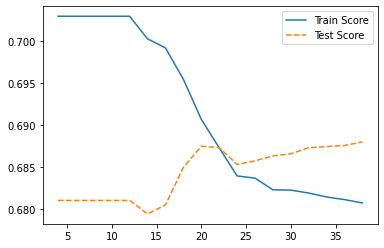

In [17]:
plt.plot(para_split, train_score, linestyle="-",label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.legend()

In [0]:
tree_graph =DecisionTreeRegressor(random_state=1234, min_samples_leaf=6, min_samples_split=20)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot",feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [0]:
train_score=[]; test_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree =DecisionTreeRegressor(random_state=1234, min_samples_leaf=6, min_samples_split=20, max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
df_score_depth=pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"] =train_score
df_score_depth["TestScore"]= test_score

In [19]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.382,0.406
1,2,0.555,0.641
2,3,0.608,0.686
3,4,0.650,0.677
4,5,0.661,0.679
5,6,0.673,0.688
6,7,0.683,0.690
7,8,0.687,0.688
8,9,0.689,0.688
9,10,0.690,0.688


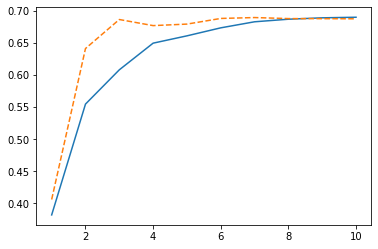

In [20]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.show()

In [0]:
tree_graph =DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth=2)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot",feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [21]:
tree_final =DecisionTreeRegressor(min_samples_leaf = 6, min_samples_split = 20, max_depth =4, random_state =1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

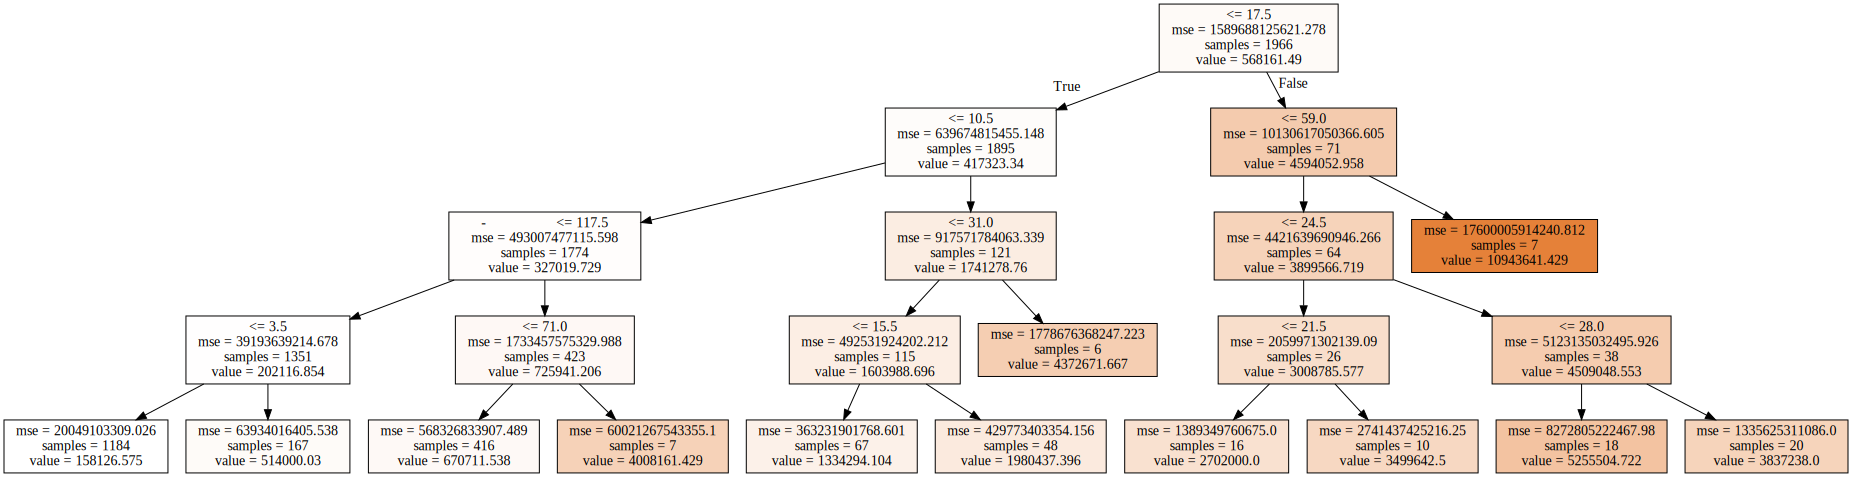

In [22]:
export_graphviz(tree_final, out_file="tree_final.dot", feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_final.dot") as f:
    dot_graph =f.read()
display(graphviz.Source(dot_graph))

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [0]:

from sklearn.preprocessing import scale, minmax_scale, robust_scale


from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [28]:
df_raw.head()

,주문자ID,상품구매금액,나이,성별,유입경로,유입기기,사업자구분,회원구분,가입-최종주문기간,AgeGroup,region,한식,중식,일식,양식,분식,카페
0,100304734@n,103300,47,남자,SNS광고,모바일,개인,일반,0,45-49,오프라인,1.0,0.0,0.0,0.0,0.0,0.0
1,1003409866@k,4308520,27,남자,카카오톡광고,모바일,개인,일반,141,25-29,서울특별시,22.0,35.0,13.0,13.0,0.0,0.0
2,100381931@n,71050,41,남자,SNS광고,모바일,개인,일반,102,40-44,대구광역시,0.0,0.0,0.0,0.0,0.0,0.0
3,1004498382@k,76400,47,남자,SNS광고,모바일,개인,일반,0,45-49,경기도,1.0,1.0,0.0,0.0,1.0,0.0
4,1004547839@k,360800,47,남자,블로그광고,PC,개인,일반,0,45-49,전라남도,2.0,0.0,2.0,2.0,2.0,0.0


In [0]:
df_num = df_raw.select_dtypes(exclude="object")

In [30]:
df_num.head()

,상품구매금액,나이,가입-최종주문기간,한식,중식,일식,양식,분식,카페
0,103300,47,0,1.0,0.0,0.0,0.0,0.0,0.0
1,4308520,27,141,22.0,35.0,13.0,13.0,0.0,0.0
2,71050,41,102,0.0,0.0,0.0,0.0,0.0,0.0
3,76400,47,0,1.0,1.0,0.0,0.0,1.0,0.0
4,360800,47,0,2.0,0.0,2.0,2.0,2.0,0.0


In [31]:
reg_model =smf.ols(formula="상품구매금액~ 나이 + 한식 + 중식 + 일식 + 양식 + 카페",data = df_raw)
reg_result= reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 상품구매금액   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1739.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        10:41:34   Log-Likelihood:                -73602.
No. Observations:                4917   AIC:                         1.472e+05
Df Residuals:                    4910   BIC:                         1.473e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.137e+05   5.24e+04     -2.170      0.0

In [36]:
df_raw_x = df_num.drop("상품구매금액", axis = 1)
df_raw_x_const = add_constant(df_raw_x)

df_vif = pd.DataFrame()
df_vif["variable"]=df_raw_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

,variable,VIF
8,카페,1.023
1,나이,1.035
2,가입-최종주문기간,1.434
6,양식,2.594
4,중식,2.877
5,일식,5.499
3,한식,5.757
7,분식,7.234
0,const,24.581


In [37]:
df_reg_coef=pd.DataFrame({'Coef':rfe_reg_result.params.values[1:]}, index= selected_cols)
df_reg_coef.plot.barh(y="Coef",legend=False)

NameError: ignored

In [38]:
df_raw_y =df_raw["상품구매금액"]
model = LinearRegression()
rfe =RFE(estimator = model, n_features_to_select = 5).fit(df_raw_x,df_raw_y) #변수 5개까지 고르겠다는 의지,
#rfe,support_ 어떤건지 확인하기 True/False 변수 5개니까 5개 True 나오게
selected_cols =df_raw_x.columns[rfe.support_] #rfe를 돌려 값을 
removed_cols = df_raw_x.columns[~rfe.support_] #false의 not이 되니깐
print("Selected Variables:{}".format(selected_cols))
#pvalue가 유의수준보다 작은애들
print("Removed Variables:{}".format(removed_cols))

Selected Variables:Index(['한식', '중식', '양식', '분식', '카페'], dtype='object')
Removed Variables:Index(['나이', '가입-최종주문기간', '일식'], dtype='object')


In [39]:
rfe_reg_model =smf.ols(formula="상품구매금액~ 한식 + 중식 + 양식 + 분식 + 카페",data = df_raw)
rfe_reg_result= rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 상품구매금액   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     2186.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        10:56:27   Log-Likelihood:                -73524.
No. Observations:                4917   AIC:                         1.471e+05
Df Residuals:                    4911   BIC:                         1.471e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    8.72e+04   1.22e+04      7.160      0.0

In [40]:
df_raw_x_rfe = df_raw_x[selected_cols]
df_raw_x_rfe_const = add_constant(df_raw_x_rfe)

df_rfe_vif = pd.DataFrame()
df_rfe_vif["variable"]=df_raw_x_rfe_const.columns
df_rfe_vif["VIF"]=[variance_inflation_factor(df_raw_x_rfe_const.values,i) for i in range(df_raw_x_rfe_const.shape[1])]

df_rfe_vif.sort_values("VIF",inplace=True)
df_rfe_vif.round(3)

,variable,VIF
5,카페,1.004
0,const,1.279
3,양식,1.811
2,중식,2.666
1,한식,5.529
4,분식,5.928


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_

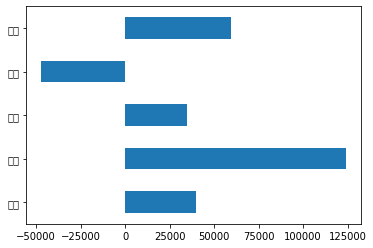

In [41]:
df_reg_coef=pd.DataFrame({'Coef':rfe_reg_result.params.values[1:]}, index= selected_cols)
df_reg_coef.plot.barh(y="Coef",legend=False)